In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyfolio as pf

import warnings
warnings.filterwarnings("ignore")

C:\Users\npc94\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\npc94\anaconda3\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
C:\Users\npc94\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\npc94\anaconda3\lib\site-packages\pyfolio\pos.py:25: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
import yfinance as yf

## 下載SPY的歷史資料

In [3]:
sp500 = yf.download('SPY',start='2010-01-01',end='2022-01-01')

[*********************100%***********************]  1 of 1 completed


## 下載TLT的歷史資料

In [4]:
tlt = yf.download('TLT',start='2010-01-01',end='2022-01-01')

[*********************100%***********************]  1 of 1 completed


In [5]:
sp_ret = sp500['Close'].pct_change().dropna()

In [6]:
sp_ret = sp_ret.rename('SPY') 

In [7]:
tlt_ret = tlt['Close'].pct_change().dropna()

In [8]:
tlt_ret = tlt_ret.rename('TLT')

In [9]:
df = pd.concat([sp_ret,tlt_ret],axis=1,sort=True)

In [10]:
df

,SPY,TLT
Date,,
2010-01-04,0.016960,-0.000890
2010-01-05,0.002647,0.006458
2010-01-06,0.000704,-0.013386
2010-01-07,0.004221,0.001682
2010-01-08,0.003328,-0.000448
...,...,...
2021-12-27,0.014152,0.002424
2021-12-28,-0.000817,-0.003963
2021-12-29,0.001279,-0.010925


## 建構60/40的股債投資組合，60%SPY和40%TLT

In [11]:
df['60/40'] = sum([df['SPY'] * 0.6, df['TLT'] * 0.4])

In [12]:
df

,SPY,TLT,60/40
Date,,,
2010-01-04,0.016960,-0.000890,0.009820
2010-01-05,0.002647,0.006458,0.004171
2010-01-06,0.000704,-0.013386,-0.004932
2010-01-07,0.004221,0.001682,0.003206
2010-01-08,0.003328,-0.000448,0.001818
...,...,...,...
2021-12-27,0.014152,0.002424,0.009461
2021-12-28,-0.000817,-0.003963,-0.002076
2021-12-29,0.001279,-0.010925,-0.003602


In [13]:
df_rtns = (df+1).cumprod() - 1

## 對三種資產報酬走勢進行繪圖比較

Text(0, 0.5, 'return')

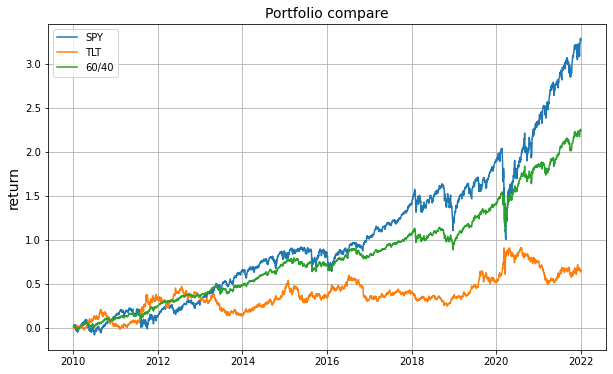

In [14]:
plt.figure(figsize=(10,6))
plt.plot(df_rtns)
plt.legend(df)
plt.grid(True)
plt.title('Portfolio compare',fontsize='14')
plt.ylabel('return',fontsize='14')

## 對60/40投資組合進行風險報酬分析

Start date,2010-01-04
End date,2021-12-31
Total months,143
,Backtest
Annual return,10.298%
Cumulative returns,223.837%
Annual volatility,9.152%
Sharpe ratio,1.12
Calmar ratio,0.58
Stability,0.98
Max drawdown,-17.811%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,17.81,2020-02-20,2020-03-18,2020-05-27,70
1,11.99,2018-08-29,2018-12-24,2019-03-29,153
2,8.55,2015-03-18,2015-08-25,2016-04-13,281
3,7.64,2018-01-26,2018-02-08,2018-08-24,151
4,7.01,2020-09-02,2020-10-30,2020-12-08,70


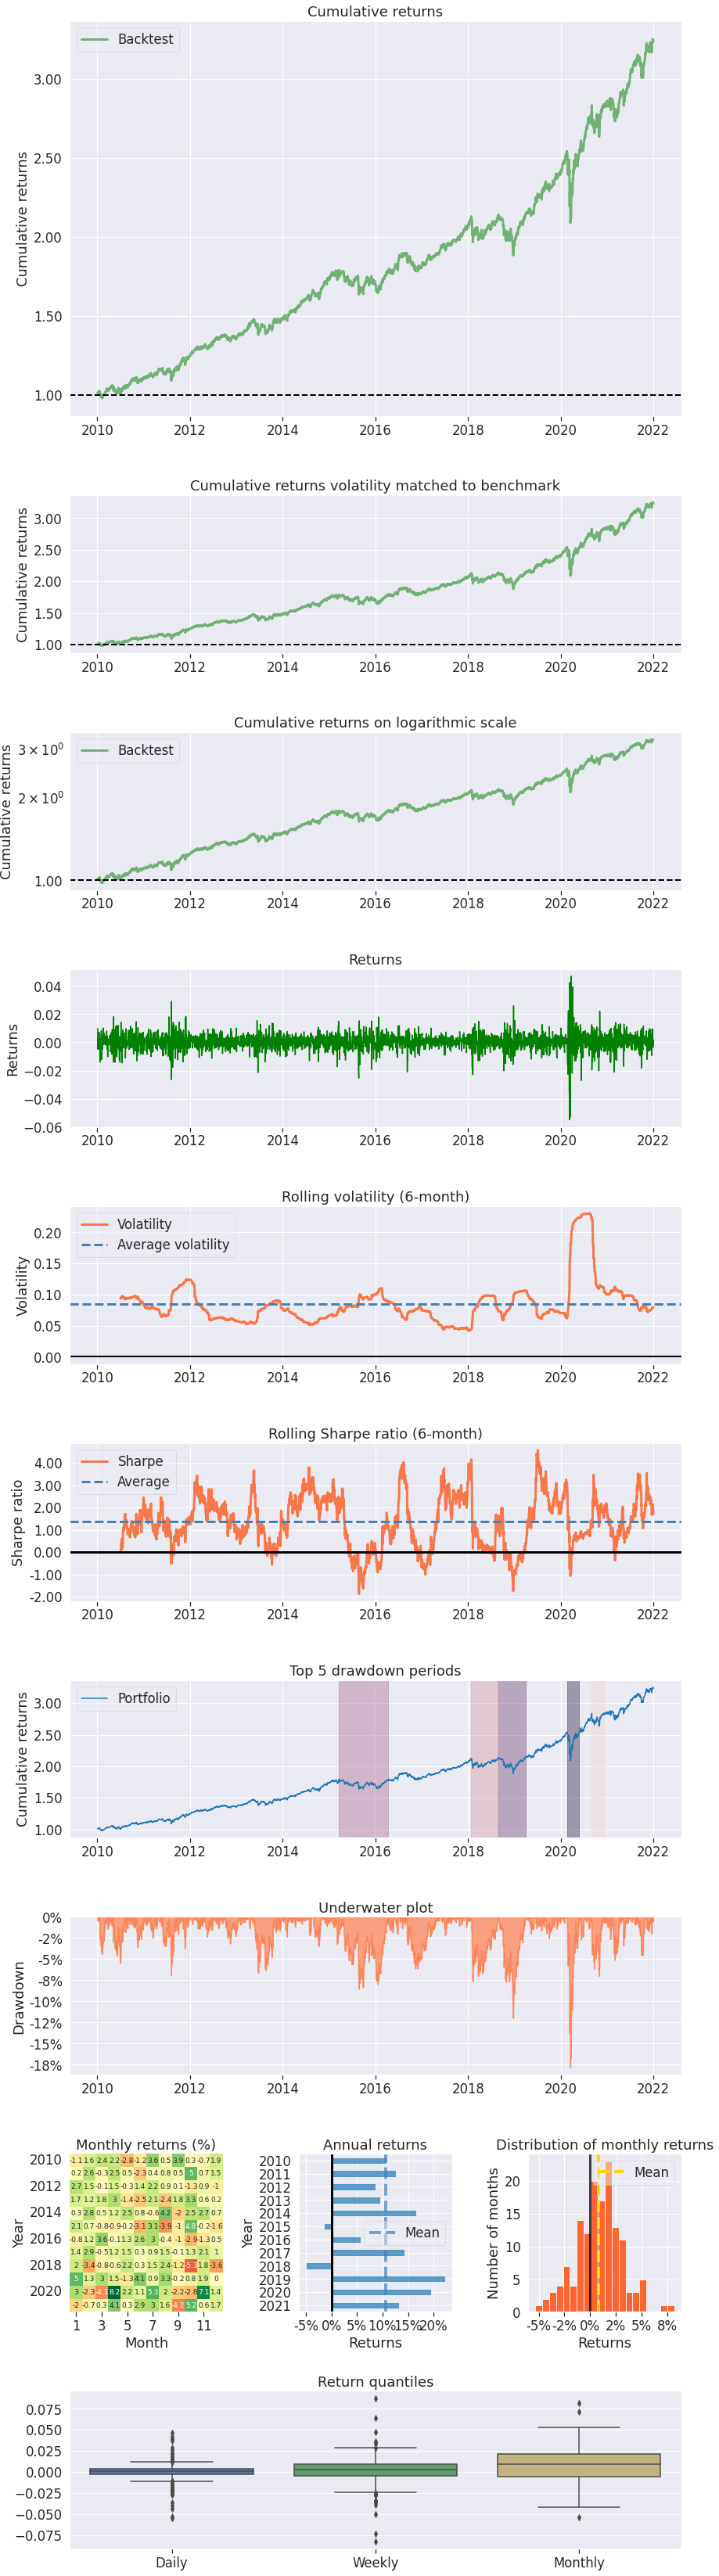

In [15]:
pf.create_returns_tear_sheet(df['60/40'])

## 對純股票(SPY)的投資組合進行風險報酬分析

Start date,2010-01-04
End date,2021-12-31
Total months,143
,Backtest
Annual return,12.855%
Cumulative returns,326.202%
Annual volatility,17.009%
Sharpe ratio,0.80
Calmar ratio,0.38
Stability,0.97
Max drawdown,-34.105%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,34.10,2020-02-19,2020-03-23,2020-08-18,130
1,20.18,2018-09-20,2018-12-24,2019-04-29,158
2,19.42,2011-04-29,2011-10-03,2012-02-21,213
3,16.10,2010-04-23,2010-07-02,2010-11-04,140
4,14.35,2015-05-21,2016-02-11,2016-07-12,299


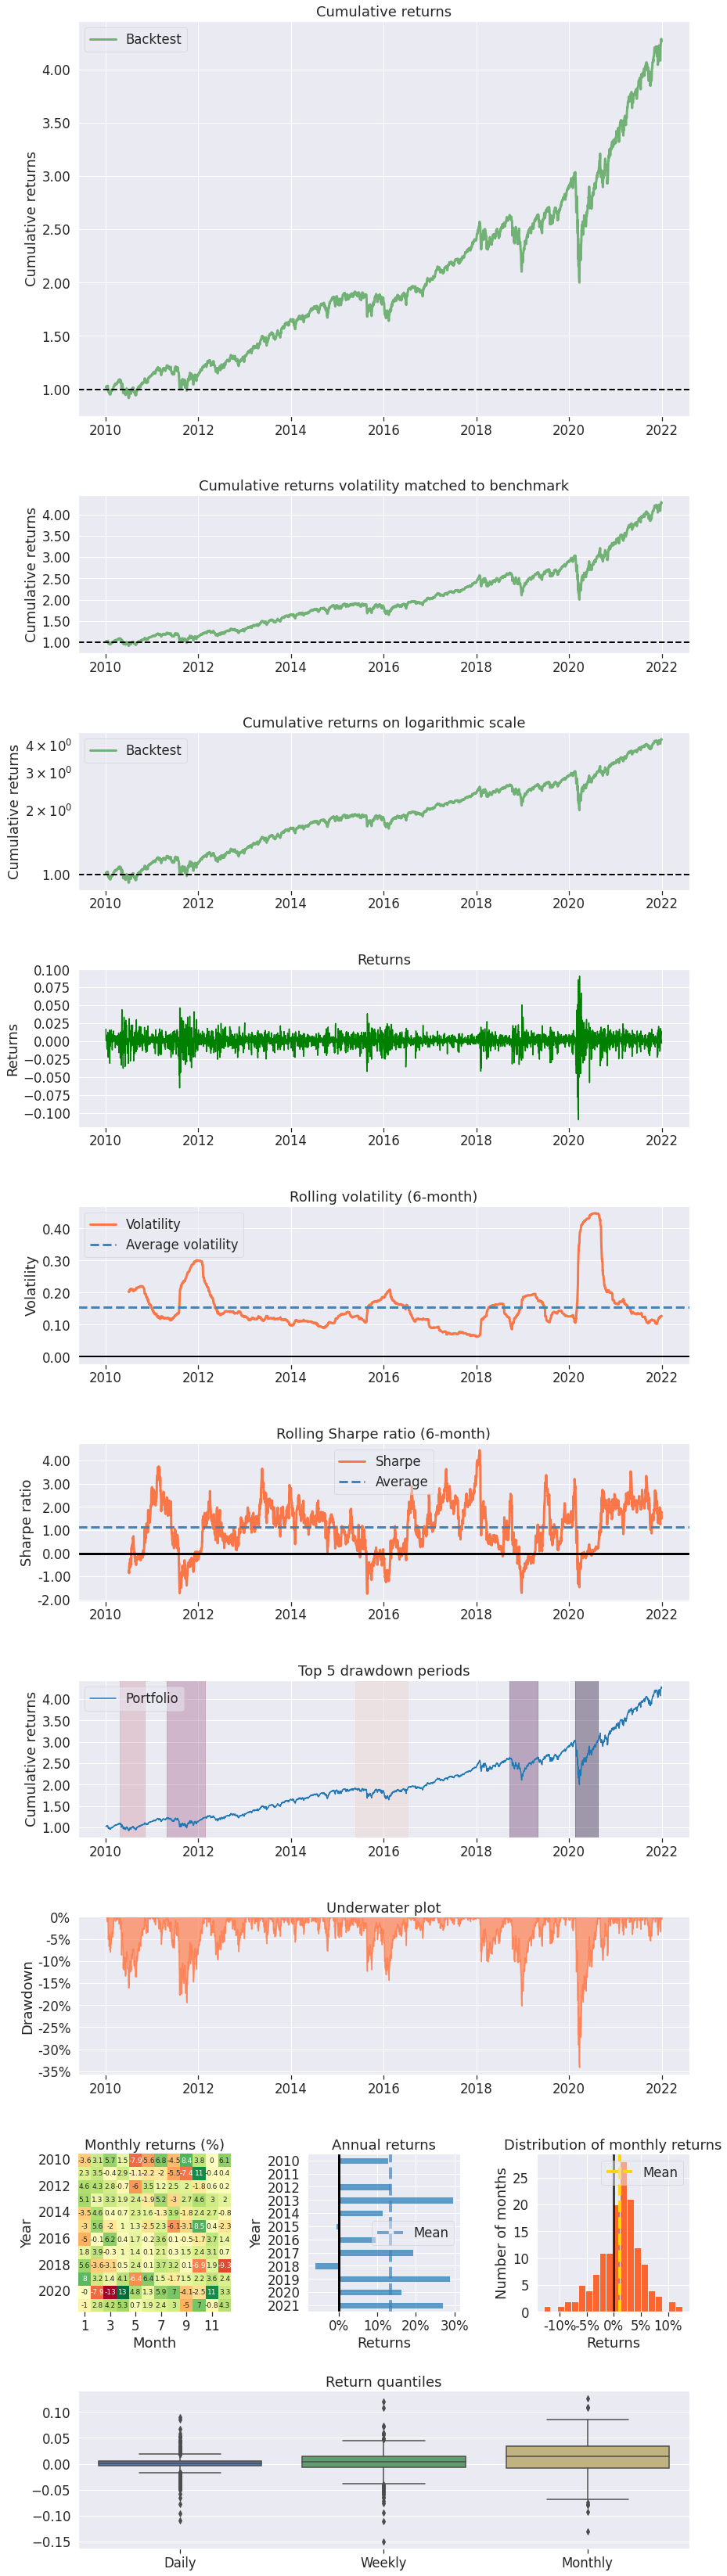

In [16]:
pf.create_returns_tear_sheet(df['SPY'])

## 對純債券(TLT)投資組合進行風險報酬分析

Start date,2010-01-04
End date,2021-12-31
Total months,143
,Backtest
Annual return,4.258%
Cumulative returns,64.857%
Annual volatility,14.599%
Sharpe ratio,0.36
Calmar ratio,0.19
Stability,0.67
Max drawdown,-22.965%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,22.96,2012-07-25,2013-12-27,2015-01-14,646
1,22.01,2016-07-08,2018-11-02,2019-08-14,809
2,21.94,2020-08-04,2021-03-18,NaT,NaN
3,18.76,2010-08-31,2011-02-10,2011-08-10,247
4,16.67,2015-01-30,2015-06-26,2016-06-27,367


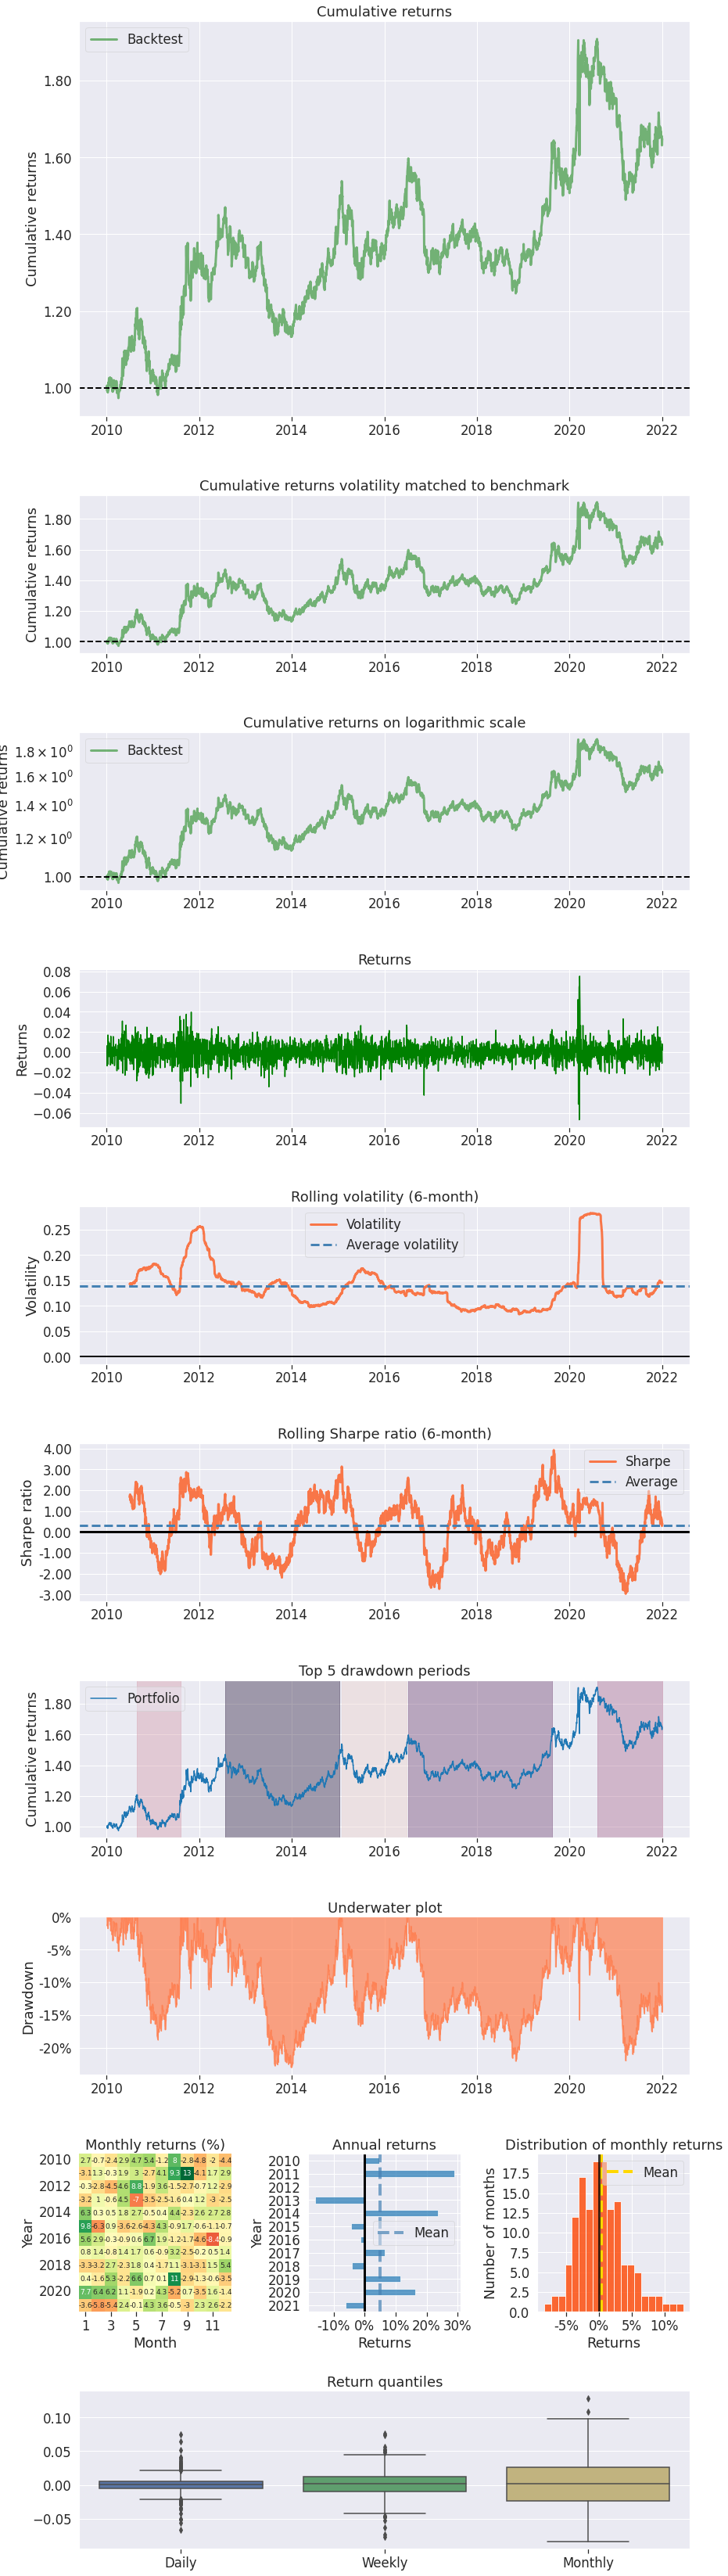

In [17]:
pf.create_returns_tear_sheet(df['TLT'])